In [46]:
import pandas as pd
from sklearn import metrics
import math

In [62]:
%run ./DataGen2.ipynb

In [48]:
#LocPerCluster = np.append(LocPerCluster, last_density)

In [49]:
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
LocPerCluster    = [25] * NumberOfClusters
r                = [30] * NumberOfClusters # nm
SNR              = 0.70
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_3'
folder = 'high_noise'

for i in range(NumberOfSimulations):
    datagen = DataGenerator(x_lim = x_lim,
                            y_lim = y_lim,
                            NumberOfClusters = NumberOfClusters,
                            LocPerCluster = LocPerCluster,
                            r = r,
                            SNR = SNR,
                            NumberOfScales = NumberOfScales,
                            delta = delta, cluster_shape = cluster_shape) 
    
    datagen.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/' + folder , name + '_' + str(i))

In [14]:
# ----- Clusters of different sizes --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_r           = 30
dev_r            = 20
density          = 25/(math.pi * mean_r**2)

r               = np.random.uniform(low = mean_r - dev_r, high = mean_r + dev_r,
                                    size = NumberOfClusters)



LocPerCluster   = [int(math.pi * rad **2  * density + 0.5) for rad in r]


SNR              = 0.70
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

In [26]:
# ----- Clusters of different densities --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_density     = 25
dev              = 15
r                = [30] * NumberOfClusters # nm

SNR              = 0.70 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_4'
folder = 'different_densities'

for i in range(NumberOfSimulations):
    LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters, 1))

    LocPerCluster  = [int(n) for n in LocPerCluster]
    
    datagen = DataGenerator(x_lim = x_lim,
                            y_lim = y_lim,
                            NumberOfClusters = NumberOfClusters,
                            LocPerCluster = LocPerCluster,
                            r = r,
                            SNR = SNR,
                            NumberOfScales = NumberOfScales,
                            delta = delta, cluster_shape = cluster_shape) 
    
    datagen.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/' + folder , name + '_' + str(i))


In [112]:
'''
# clusters with different densities. Average density = 25 loc/clusters. 
mean_density = 25
dev = 15
LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters - 1 , 1))
LocPerCluster  = [int(n) for n in LocPerCluster]
last_density = mean_density * NumberOfClusters - np.sum(LocPerCluster)
last_density = int(last_density)
print('last_density:', last_density)
LocPerCluster = np.append(LocPerCluster, last_density)
print(np.mean(LocPerCluster))
'''
# For clusters with different densities. 
mean_density = 25
dev = 15
LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters, 1))

LocPerCluster  = [int(n) for n in LocPerCluster]


SyntaxError: invalid syntax (<ipython-input-112-112f81042516>, line 20)

In [114]:
r[:,0]

array([37.22146712, 27.28876398, 16.67419661, 42.59214037, 36.97807084,
       12.38365565, 17.12709622, 39.08223359, 40.57002931, 49.58899606,
       40.86901415, 33.63754816, 48.96807588, 30.93838917, 35.43705418,
       22.38405493, 40.91525995, 29.18589977, 45.95152785, 43.64724046,
       15.91346461, 49.5799197 , 38.59166261, 37.26084997, 10.88383502,
       40.39664963, 21.60587047, 23.05964823, 34.03981297, 46.86545566,
       30.23028855, 35.05901201, 15.54207032, 17.9205686 , 34.21801901,
       29.64590795, 28.94758962, 42.89293717, 44.59920819, 46.16905176])

In [67]:
np.mean(LocPerCluster)

23.85

In [69]:
name = 'simulated_SMLM_4'
comment = 'clusters of different densities. The mean density is the standard denstity.'

In [65]:
datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        SNR = 0.25,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 

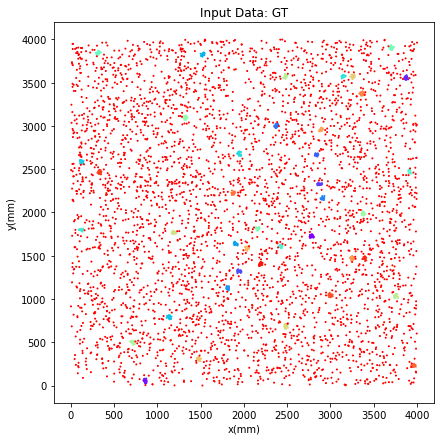

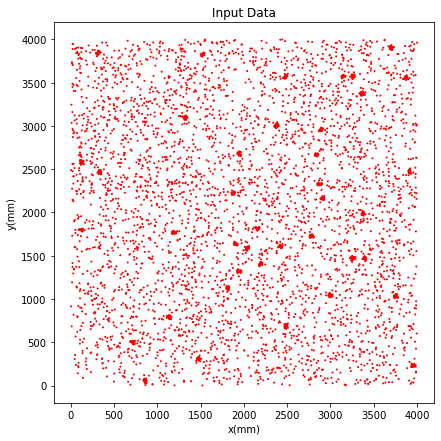

In [66]:
datagen2.plot_points(dot_size = 1)

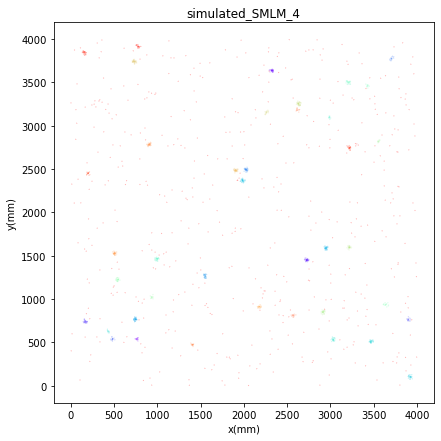

In [72]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)


In [73]:
dict_parameters = {'x_lim': x_lim , 'y_lim': y_lim, 'NumberOfClusters': NumberOfClusters, 
                  'LocPerCluster': LocPerCluster, 'r': r , 'SNR': SNR, 
                  'delta': delta, 'NumberOfScales': NumberOfScales,
                  'cluster_shape' : cluster_shape}

In [74]:
with open('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'+ name + '_param.txt', 'w') as f:
    print(dict_parameters, file=f)
    print('# ' + comment, file = f)

In [75]:
datagen2.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data', name)

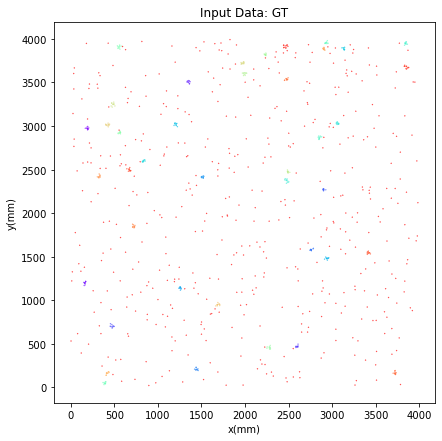

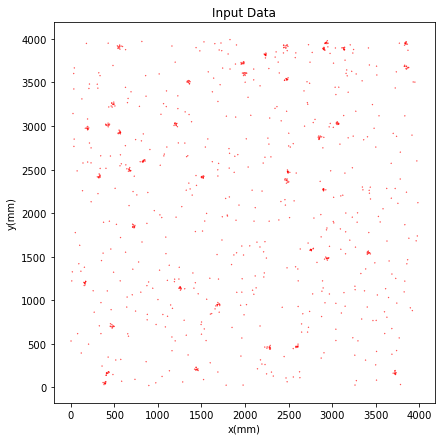

In [26]:
datagen2.plot_points(dot_size = 0.1)

Voir si on peut dessiner et sauver la figure après coup, après avoir généré et sauver les points en csv: C'est bon ça marche en mettant en numpy.

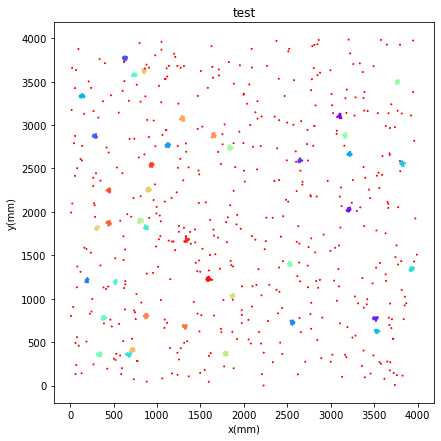

In [17]:
plot_points(dat[['x', 'y']].to_numpy(), dat['labels_1'].to_numpy(), 'test', 1)

# Sauver les figures. 5 mai, pour meeting

In [38]:
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
LocPerCluster    = [25] * NumberOfClusters
r                = [30] * NumberOfClusters # nm
SNR              = 0.25 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1


name = 'simulated_SMLM_4'

datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        SNR = SNR,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape)


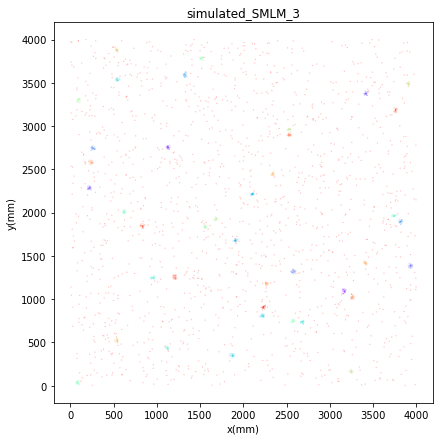

In [39]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)

In [42]:
# ----- Clusters of different densities --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_density     = 25
dev              = 15
r                = [30] * NumberOfClusters # nm

IsolatedLoc      = 500 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_4'

LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                size = (NumberOfClusters, 1))

LocPerCluster  = [int(n) for n in LocPerCluster]

datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        IsolatedLoc = IsolatedLoc,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 
    

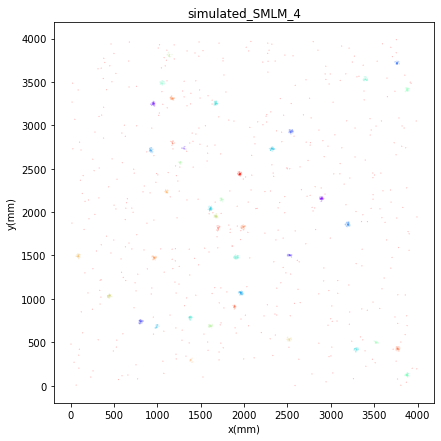

In [43]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)

In [44]:
# ----- Clusters of different sizes --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_r           = 30
dev_r            = 20
density          = 25/(math.pi * mean_r**2)

r               = np.random.uniform(low = mean_r - dev_r, high = mean_r + dev_r,
                                    size = NumberOfClusters)



LocPerCluster   = [int(math.pi * rad **2  * density + 0.5) for rad in r]


IsolatedLoc      = 500 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1



name = 'simulated_SMLM_5'


datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        IsolatedLoc = IsolatedLoc,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 
    

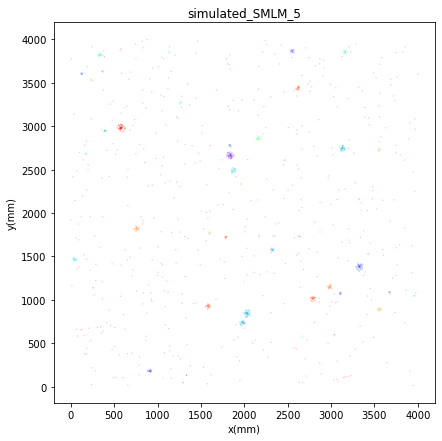

In [45]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)